In [1]:
import pandas as pd

In [35]:
df = pd.read_csv('data_with_PG_new.csv')

In [65]:
df = pd.read_csv('PG_campaigning.csv')

In [58]:
df

,Timestamp,Who did you vote for as President?,"If you chose NOTA/ didn't vote/ voted randomly, then reason for it:","Before the debate, how interested were you in voting for the person you ended up choosing?",Did you participate in campaigning for the candidate you voted for?,How much did the campaigning by the candidate's team(for whom you voted) influence your vote?,"To your knowledge, did you and your close friends vote for the same candidate?",Did you think that the candidate you voted for is a better choice than last year's president?,Why did you vote for him?,"After the debate and primary elections, how interested were you in voting for the person you ended up choosing?",Who did you vote for as Mess secretary?,Why did you vote for him?.1,Your Program,How much did the campaigning by the candidate's team(for whom you voted) influence your vote?.1,How much did the campaigning by the candidate's team(for whom you voted) influence your vote?.2,What was the most appealing factor in the mess agenda
0,4/14/2024 21:51:58,Nihar Karthikeya,NaN,6,No,3,Yes,8,Regional or some other kind of connection,8,Kaushal Singh,Regional or some other kind of connection,UG,NaN,NaN,NaN
1,4/14/2024 22:05:57,Rishi Cheekatla,NaN,2,No,1,Yes,5,You found the agenda appealing,5,Abhay Kosaraju,Friends insisted to choose him,PG,NaN,NaN,NaN
2,4/14/2024 22:06:04,Nihar Karthikeya,NaN,10,Yes,3,Yes,10,Just felt that he was better than the other,10,Kaushal Singh,You found the agenda appealing,UG,NaN,NaN,NaN
3,4/14/2024 22:06:04,Nihar Karthikeya,NaN,10,Yes,3,Yes,10,You are close friends (or) are from same branch,10,Kaushal Singh,You found the agenda appealing,UG,NaN,NaN,NaN
4,4/14/2024 22:06:06,Rishi Cheekatla,NaN,4,No,5,Yes,1,Friends insisted to choose him,1,Kaushal Singh,Friends insisted to choose him,UG,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,4/14/2024 21:51:58,Nihar Karthikeya,NaN,3,No,1,No,1,Regional or some other kind of connection,6,Kaushal Singh,Friends insisted to choose him,UG,9.0,9.0,NaN
252,4/14/2024 21:51:58,Rishi Cheekatla,NaN,1,No,2,Yes,9,Regional or some other kind of connection,8,Kaushal Singh,You are close friends (or) are from same branch,UG,10.0,7.0,NaN
253,4/14/2024 21:51:58,Nihar Karthikeya,NaN,9,No,2,No,8,Regional or some other kind of connection,9,Kaushal Singh,Regional or some other kind of connection,UG,4.0,3.0,NaN
254,4/14/2024 21:51:58,Rishi Cheekatla,NaN,9,No,9,Yes,7,Regional or some other kind of connection,9,Abhay Kosaraju,Regional or some other kind of connection,UG,6.0,9.0,NaN


Hypothesis : Variance of difference of of level before and after debate is lessser fopr mess than for President

In [80]:
ug_responses = df[df['Your Program'] == 'UG']
pg_responses = df[df['Your Program'] == 'PG']


In [81]:
print(len(ug_responses))

152


In [82]:
print(len(pg_responses))

104


In [49]:
agenda_ug = ug_responses[ug_responses["Why did you vote for him?"] == "You found the agenda appealing"]
agenda_pg = pg_responses[pg_responses["Why did you vote for him?"] == "You found the agenda appealing"]

In [50]:
print(len(agenda_pg))

13


In [30]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# nihar_ug = agenda_ug[agenda_ug["Who did you vote for as President?"] == "Nihar Karthikeya"]
# nihar_pg = agenda_pg[agenda_pg["Who did you vote for as President?"] == "Nihar Karthikeya"]
# rishi_ug = agenda_ug[agenda_ug["Who did you vote for as President?"] == "Rishi Cheekatla"]
# rishi_pg = agenda_pg[agenda_pg["Who did you vote for as President?"] == "Rishi Cheekatla"]

before_debate_ug = []
after_debate_ug = []
for index, row in agenda_ug.iterrows():
    before_debate_ug.append(row["Before the debate, how interested were you in voting for the person you ended up choosing?"])
    after_debate_ug.append(row["After the debate and primary elections, how interested were you in voting for the person you ended up choosing?"])

before_debate_pg = []
after_debate_pg = []
for index, row in agenda_pg.iterrows():
    before_debate_pg.append(row["Before the debate, how interested were you in voting for the person you ended up choosing?"])
    after_debate_pg.append(row["After the debate and primary elections, how interested were you in voting for the person you ended up choosing?"])

difference_ug = [after_debate_ug[i] - before_debate_ug[i] for i in range(len(before_debate_ug))]
# print(difference_ug)
frequency_array_ug = [0 for i in range(19)]
for i in difference_ug:
    frequency_array_ug[int(i) + 9] += 1
print(frequency_array_ug)

difference_pg = [after_debate_pg[i] - before_debate_pg[i] for i in range(len(before_debate_pg))]
# print(difference_pg)
frequency_array_pg = [0 for i in range(19)]
for i in difference_pg:
    frequency_array_pg[int(i) + 9] += 1
print(frequency_array_pg)

variance1 = np.var(frequency_array_ug)
variance2 = np.var(frequency_array_pg)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 3, 1, 7, 1, 0, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 1, 3, 5, 6, 6, 3, 1, 6, 5, 1, 1, 2, 3, 0]


In [31]:
import math

count1 = 0
count2 = 0
condition1 = (df['Who did you vote for as President?'] == 'Rishi Cheekatla') & (df['Why did you vote for him?'] == 'Friends insisted to choose him')
count1 += condition1.sum()
condition2 = (df['Who did you vote for as President?'] == 'Nihar Karthikeya') & (df['Why did you vote for him?'] == 'Friends insisted to choose him')
count2 += condition2.sum()

n1 = (df['Who did you vote for as President?'] == 'Rishi Cheekatla').sum()
n2 = (df['Who did you vote for as President?'] == 'Nihar Karthikeya').sum()

p1_hat = count1 / n1
p2_hat = count2 / n2
print(p1_hat)
print(p2_hat)

# Rejection Region Approach
Z = ((p1_hat - p2_hat) - 0.2) / (math.sqrt(p1_hat*(1-p1_hat)/n1 + p2_hat*(1-p2_hat)/n2))
Z_alpha = 1.645
print(Z)

0.2191780821917808
0.1415929203539823
-2.581994503705925


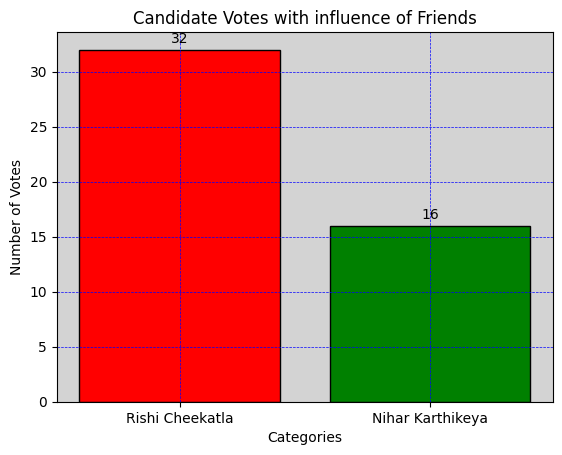

In [89]:
import matplotlib.pyplot as plt

categories = ['Rishi Cheekatla', 'Nihar Karthikeya']
votes = [count1, count2]

fig, ax = plt.subplots()
bars = ax.bar(categories, votes, color=['red', 'green'], edgecolor='black')
ax.set_facecolor("lightgray")

for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel('Categories')
plt.ylabel('Number of Votes')
plt.title('Candidate Votes with influence of Friends')


plt.grid(color = 'blue', linestyle = '--', linewidth = 0.5)

plt.show()


In [32]:
import math

# Count of votes for Rishi Cheekatla where reason is 'Friends insisted to choose him'
count1 = ((df['Who did you vote for as President?'] == 'Rishi Cheekatla') & (df['Why did you vote for him?'] == 'Friends insisted to choose him')).sum()

# Count of votes for Nihar Karthikeya where reason is 'Friends insisted to choose him'
count2 = ((df['Who did you vote for as President?'] == 'Nihar Karthikeya') & (df['Why did you vote for him?'] == 'Friends insisted to choose him')).sum()

# Total number of votes for Rishi Cheekatla and Nihar Karthikeya respectively
n1 = (df['Who did you vote for as President?'] == 'Rishi Cheekatla').sum()
n2 = (df['Who did you vote for as President?'] == 'Nihar Karthikeya').sum()

# Proportions
p1_hat = count1 / n1
p2_hat = count2 / n2

# Rejection Region Approach
Z_alpha = 1.645
ci_lower = (p1_hat - p2_hat) - Z_alpha * math.sqrt(p1_hat*(1-p1_hat)/n1 + p2_hat*(1-p2_hat)/n2)
ci_upper = (p1_hat - p2_hat) + Z_alpha * math.sqrt(p1_hat*(1-p1_hat)/n1 + p2_hat*(1-p2_hat)/n2)

print("Confidence interval:", (ci_lower, ci_upper))


Confidence interval: (-0.0004058673792631806, 0.1555761910548602)


In [83]:
campaigning_ug = ug_responses[ug_responses["Did you participate in campaigning for the candidate you voted for?"] == "Yes"]
campaigning_pg = pg_responses[pg_responses["Did you participate in campaigning for the candidate you voted for?"] == "Yes"]

n1 = len(ug_responses)
n2 = len(pg_responses)

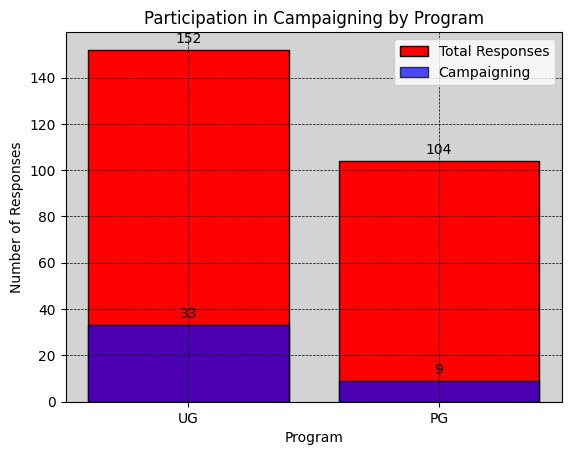

In [96]:
import matplotlib.pyplot as plt

total_ug_responses = len(ug_responses)
total_pg_responses = len(pg_responses)

campaigning_ug_responses = len(campaigning_ug)
campaigning_pg_responses = len(campaigning_pg)

labels = ['UG', 'PG']
total_responses = [total_ug_responses, total_pg_responses]
campaigning_responses = [campaigning_ug_responses, campaigning_pg_responses]

# plt.bar(labels, total_responses, label='Total Responses')
# plt.bar(labels, campaigning_responses, label='Campaigning', alpha=0.7)

# plt.xlabel('Level of Education')
# plt.ylabel('Number of Responses')
# plt.title('Participation in Campaigning by Education Level')
# plt.legend()

# # Show the plot
# plt.show()

categories = ['UG', 'PG']
# votes = [count1, count2]

fig, ax = plt.subplots()
bars = ax.bar(categories, total_responses, color=['red', 'red'], edgecolor='black', label='Total Responses')
bars2 = ax.bar(categories, campaigning_responses, color=['blue', 'blue'], edgecolor='black', alpha=0.7, label = 'Campaigning')
ax.set_facecolor("lightgray")

for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    
for bar in bars2:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel('Program')
plt.ylabel('Number of Responses')
plt.title('Participation in Campaigning by Program')
plt.legend()


plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)

plt.show()


In [84]:
print(n1)

152


In [85]:
campaigning_pg

,Timestamp,Who did you vote for as President?,"If you chose NOTA/ didn't vote/ voted randomly, then reason for it:","Before the debate, how interested were you in voting for the person you ended up choosing?",Did you participate in campaigning for the candidate you voted for?,How much did the campaigning by the candidate's team(for whom you voted) influence your vote?,"To your knowledge, did you and your close friends vote for the same candidate?",Did you think that the candidate you voted for is a better choice than last year's president?,Why did you vote for him?,"After the debate and primary elections, how interested were you in voting for the person you ended up choosing?",Who did you vote for as Mess secretary?,Why did you vote for him?.1,Your Program,How much did the campaigning by the candidate's team(for whom you voted) influence your vote?.1,How much did the campaigning by the candidate's team(for whom you voted) influence your vote?.2,What was the most appealing factor in the mess agenda
150,4/18/2024 17:11:08,Rishi Cheekatla,NaN,5,Yes,5,Not sure,1,Friends insisted to choose him,5,Abhay Kosaraju,Just felt that he was better than the other,PG,NaN,NaN,NaN
228,4/14/2024 22:05:57,Nihar Karthikeya,NaN,6,Yes,3,Yes,4,You found the agenda appealing,10,Kaushal Singh,Regional or some other kind of connection,PG,2.0,9.0,NaN
230,4/14/2024 22:05:57,Rishi Cheekatla,NaN,4,Yes,9,No,3,You found the agenda appealing,10,Kaushal Singh,You found the agenda appealing,PG,10.0,5.0,NaN
232,4/14/2024 22:05:57,Rishi Cheekatla,NaN,3,Yes,6,Yes,4,You found the agenda appealing,7,Abhay Kosaraju,Voted Randomly/NOTA/ Didn't Vote,PG,10.0,2.0,NaN
237,4/14/2024 22:05:57,Rishi Cheekatla,NaN,7,Yes,7,No,1,You found the agenda appealing,6,Abhay Kosaraju,You found the agenda appealing,PG,2.0,6.0,NaN
241,4/14/2024 22:05:57,Nihar Karthikeya,NaN,6,Yes,9,Yes,10,You found the agenda appealing,8,Kaushal Singh,You found the agenda appealing,PG,6.0,9.0,NaN
245,4/14/2024 22:05:57,Nihar Karthikeya,NaN,7,Yes,4,No,10,You found the agenda appealing,7,Kaushal Singh,Just felt that he was better than the other,PG,2.0,2.0,NaN
248,4/14/2024 22:05:57,Nihar Karthikeya,NaN,5,Yes,6,Yes,6,You found the agenda appealing,10,Kaushal Singh,You found the agenda appealing,PG,1.0,6.0,NaN
252,4/14/2024 22:05:57,Rishi Cheekatla,NaN,8,Yes,6,No,5,You found the agenda appealing,6,Abhay Kosaraju,Voted Randomly/NOTA/ Didn't Vote,PG,2.0,5.0,NaN


In [86]:
print(n1, n2)

152 104


,Timestamp,Who did you vote for as President?,"If you chose NOTA/ didn't vote/ voted randomly, then reason for it:","Before the debate, how interested were you in voting for the person you ended up choosing?",Did you participate in campaigning for the candidate you voted for?,How much did the campaigning by the candidate's team(for whom you voted) influence your vote?,"To your knowledge, did you and your close friends vote for the same candidate?",Did you think that the candidate you voted for is a better choice than last year's president?,Why did you vote for him?,"After the debate and primary elections, how interested were you in voting for the person you ended up choosing?",Who did you vote for as Mess secretary?,Why did you vote for him?.1,Your Program,How much did the campaigning by the candidate's team(for whom you voted) influence your vote?.1,How much did the campaigning by the candidate's team(for whom you voted) influence your vote?.2,What was the most appealing factor in the mess agenda
1,4/14/2024 22:05:57,Rishi Cheekatla,NaN,2,No,1,Yes,5,You found the agenda appealing,5,Abhay Kosaraju,Friends insisted to choose him,PG,NaN,NaN,NaN
8,4/14/2024 22:06:47,Didn't Vote,Found no candidate worthy,1,No,1,No,1,Voted randomly/NOTA/Didn't vote,1,Didn't Vote,Voted Randomly/NOTA/ Didn't Vote,PG,NaN,NaN,NaN
10,4/14/2024 22:08:25,Didn't Vote,Not interested in elections,1,No,1,Not sure,1,Voted randomly/NOTA/Didn't vote,1,Didn't Vote,Voted Randomly/NOTA/ Didn't Vote,PG,NaN,NaN,NaN
15,4/14/2024 22:10:51,Rishi Cheekatla,NaN,5,No,5,Not sure,10,Just felt that he was better than the other,8,Abhay Kosaraju,Just felt that he was better than the other,PG,NaN,NaN,NaN
17,4/14/2024 22:11:43,Rishi Cheekatla,Found no candidate worthy,5,No,1,Yes,5,Voted randomly/NOTA/Didn't vote,5,Kaushal Singh,Just felt that he was better than the other,PG,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,4/14/2024 22:05:57,Rishi Cheekatla,NaN,5,No,1,Yes,9,You found the agenda appealing,9,Kaushal Singh,You are close friends (or) are from same branch,PG,2.0,10.0,NaN
252,4/14/2024 22:05:57,Rishi Cheekatla,NaN,8,No,4,Yes,10,You found the agenda appealing,8,Kaushal Singh,Voted Randomly/NOTA/ Didn't Vote,PG,7.0,8.0,NaN
253,4/14/2024 22:05:57,Rishi Cheekatla,NaN,10,No,5,No,4,You found the agenda appealing,8,Kaushal Singh,You found the agenda appealing,PG,4.0,5.0,NaN
254,4/14/2024 22:05:57,Nihar Karthikeya,NaN,3,No,8,Yes,2,You found the agenda appealing,7,Kaushal Singh,Voted Randomly/NOTA/ Didn't Vote,PG,8.0,6.0,NaN


In [43]:
len(df)

286

In [44]:
33 / 286

0.11538461538461539

In [72]:
print(len(campaigning_pg) / n1)

0.2727272727272727


In [88]:
p1_cap = len(campaigning_ug) / n1
p2_cap = len(campaigning_pg) / n2


Z = ((p2_cap - p1_cap)) / (math.sqrt(p1_cap*(1-p1_cap)/n1 + p2_cap*(1-p2_cap)/n2))
Z_alpha = 1.645
if Z < -Z_alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
# print(Z)


Z_alpha = 1.645
ci_lower = (p1_cap - p2_cap) - Z_alpha * math.sqrt(p1_cap*(1-p1_cap)/n1 + p2_cap*(1-p2_cap)/n2)
ci_upper = (p1_cap - p2_cap) + Z_alpha * math.sqrt(p1_cap*(1-p1_cap)/n1 + p2_cap*(1-p2_cap)/n2)

print("Confidence interval:", (ci_lower, ci_upper))




Reject Null Hypothesis
Confidence interval: (0.059273190388862404, 0.201860412850004)


In [74]:
np.sqrt(p1_cap*(1-p1_cap)/n1 + p2_cap*(1-p2_cap)/n2)

0.0

In [76]:
p1_cap = len(campaigning_ug) / n1
p2_cap = len(campaigning_pg) / n2

In [78]:
p1_cap

1.0

In [77]:
p1_cap*(1-p1_cap)/n1

0.0